# 17003496 #

# PHAS0029 Final Assignment 2019 #

In [1]:
# interactive plots
%matplotlib notebook

# importing required modules
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Image

# Introduction #

In this assignment, I shall be solving the quantum-mechanical problem of a particle in an infinite square well.  I will first be developing a method of iteratively solving an infinite square potential well with a potential of $ V(x) = 0.0 $ within the well, which will be compared to known results to check whether the method is correct. Then this will be extended to calculate the energies and wavefunctions of systems that cannot simply be solved analytically such as harmonic potentials, finite square well and a potential step.

###### Note 1: For some of the plots you are about to see, the y label does not show. This is because the values on the y-axis are so large that the label for the y-axis is no longer shown on the graphs. However they have been included if you look at the code cells.

###### Note 2: The code comments for certain sections within this notebook are almost identical to the other sections. This becomes very evident when getting to the harmonic potentials. They are just there so that I can easily understand what my code does, without having to go to previous code cells to figure out what the code does.

###### Note 3: When doing 'Restart & Run All' for this notebook, I noticed that frequently the graphs would not show up properly, so I would have to manually run all the cells and then they would show up. Whether this is a universal problem or a problem with my computer, I thought it would be useful to include this information.

# Theory #

The main equation that is important to this assignment is the time-independent Schrödinger equation (or TISE), which has the form shown below:

$$
-\frac{\hbar^2}{2m} \frac{d^2\psi}{dx^2} + V(x)\psi(x) = E\psi(x) \quad (1)
$$

where $ \hbar $ is the reduced Planck's constant, $ m $ is the mass of the particle, $ V(x) $ is the potential within the potential well, $ E $ is the energy of the particle, $ \psi(x) $ is the wavefunction of the particle and $ x $ is the position of the particle. Here the particle in question is an electron.

We shall initially be looking at the most common solutions of this equation, which arise from an infinite square well of width $ 2a $, where $ a = 5 \times 10^{11}m $, with the potential shown below:

$$ V_x = \begin{cases} 0 & \text{if } -a \leq x \leq +a, \\ 
\infty  & \text{if } |x| > a, \end{cases} 
$$

This results in the probabilty of finding the particle outside the well being zero, and wavefunctions within the well must satisfy the boundary conditions of $ \psi(a) = \psi(-a) = 0 $.
The solving for system can begin by first separating equation (1) into two 1st-order equations shown below:

$$
\frac{d \psi}{dx } = \phi, \quad (2) \\
\frac{d \phi}{dx } = \frac{2m}{\hbar^2} \left[V(x) - E \right] \psi(x), \quad (3)
$$

Since the Schrödinger equation is a linear, eigenvalue equation, it only has solutions at specific values of energy $ E $, and hence there are no further values of energy that satisy the boundary condition requirement. Due to this we will be using the 4th-order Runge Kutta method with the iterative Secant method, in order to solve for the energy and hence generate a normalised wavefunction for the calculated energy.

An example of an infinite square well with $ V(x) = 0 $ within the well is shown by Figure 1 below.

# Infinite Square Well #

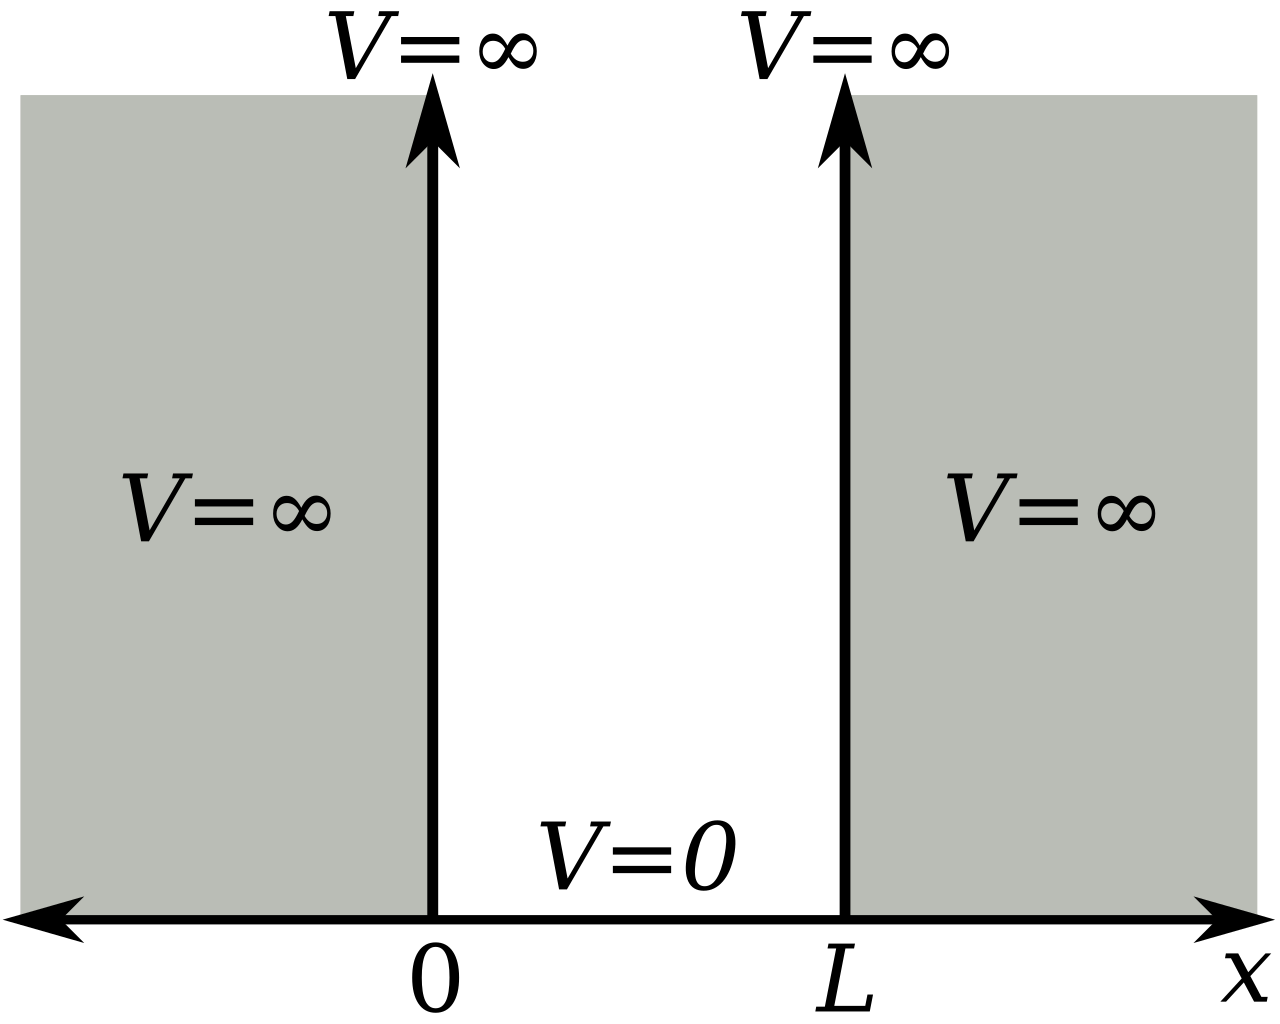

In [2]:
# Figure 1 - Infinite Square Well with V = 0 inside the well [1]
Image('https://upload.wikimedia.org/wikipedia/commons/thumb/2/27/Infinite_potential_well.svg/1280px-Infinite_potential_well.svg.png', width=500)

In [3]:
# defining constants
em = 9.10938356e-31 # electron mass in KILOGRAMS (kg)
h_bar = 1.0545718e-34 # reduced planck's constant in JOULE-SECONDS (Js)
e = 1.60217662e-19 # electron charge in COULOMBS (C)
a = 5e-11 # half-width of potential well in METRES (m)

N = 1000 # number of Runge-Kutta calculation points
xpoints = np.linspace(-a, a, N) # array of 1000 x-points from -a to a
h = (2*a)/N # the difference in x-position of adjacent x-points (step size)

psi_i = 0.0 # initial value of psi
phi_i = 1.0 # initial value of phi
r = [psi_i, phi_i] # array of psi & phi

In the code cell above I have defined all the constants that I will be using throughout this section and most of the assignment, unless otherwise specified.

In [4]:
def V(x):
    '''1st function for the potential of the infinite square well. The potential is 0 within the well
    and infinity outside of the well.
    Input: a value or array of x points
    Output: 0.0, since the potential is 0 within the well'''
    
    return 0.0

In [5]:
def RHS(r,x,E):
    '''Definition of the two 1st-order equations obtained from separating the Schrödinger equation
    This is used to solve for values of energy, when used in conjunction with the 4th-order Runge Kutta
    and the Secant method.
    Inputs:
    - r = a vector of psi (r[0]) and phi (r[1])
    - x = a value or array of x points
    - E = energy of the particle
    Outputs:
    - an array of d(psi)/dx and d(phi)/dx'''
    
    # assigning psi and psi elements to respective variables for simplicity
    psi = r[0]
    phi = r[1]
    dpsi_dx = phi # calculates d(psi)/dx as shown by equation (2) above
    dphi_dx = ((2*em)/(h_bar)**2)*(V(x)-E)*psi # calculates d(phi)/dx as shown by equation (3) above
    return np.array([dpsi_dx,dphi_dx], float) # returns array of d(psi)/dx and d(phi)/dx values

In [6]:
# reused and modified function from previous sessions
def RK(r,xvalues,E):
    '''Fourth-order Runge-Kutta used to solve for psi(x)
    Inputs:
    - r = a vector of psi (r[0]) and phi (r[1]), the same as RHS function
    - xvalues = a value or array of x points, the same as RHS function
    - E = energy of the particle
    Outputs:
    - an array of psi(x) values'''
    
    # insert the initial psi and phi into respective arrays
    psi_x = [r[0]]
    phi_x = [r[1]]
    
    # Runge Kutta loops over all x values in input array
    # after each loop, psi & phi value obtained for given x
    for x in xvalues:
        k1 = h*RHS(r, x, E) 
        k2 = h*RHS(r+0.5*k1, x+0.5*h, E)
        k3 = h*RHS(r+0.5*k2, x+0.5*h, E)
        k4 = h*RHS(r+k3, x+h, E)
        r = r + (k1 + 2*k2 + 2*k3 + k4)/6
        psi_x.append(r[0]) # adds psi value to psi(x) array
        phi_x.append(r[1]) # adds phi value to phi(x) array
    return np.array(psi_x, float) # returns array of psi(x) values

The three code cells above have been used to define the three functions that will be used throughout the notebook. The 1st is the potential of the infinite square well where the potential within the well is $ V(x) = 0 $. The 2nd function is the calculation of $ \frac{d \psi}{dx } $ and $ \frac{d \phi}{dx } $ using the 1st-order equations (2) and (3) obtained from separating the Schrödinger equation. The 3rd function is the definition of the 4th-order Runge Kutta method, obtained and modified for the purposes of this task from a previous session, that will use both the 1st and 2nd functions to output an array of $ \psi(x) $ values. This function will be what is used in the Secant method to find the energy at which the boundary conditions are satisfied.

## Finding Ground State Energy ##

In [7]:
# 2 initial guesses for ground state energy in JOULES (J)
E1 = 1e-19
E2 = 3e-19

tolerance = e/1000

The tolerance determines the maximum difference between the values of E1 and E2 that is acceptable when trying to find the energy of the ground state. So a difference between E1 and E2 that is greater than the tolerance is not accurate enough to deduce that we have found the energy eigenvalue.

In [8]:
# Iterates the secant method while the modulus of the
# difference between E1 and E2 is greater than the tolerance value
while abs(E2-E1) > tolerance:
    # calculates array of psi values using each initial energy guesses
    psi1 = RK(r, xpoints, E1)
    psi2 = RK(r, xpoints, E2)
    # calculates new energy using 2 initial guesses and final element of psi arrays
    E3 = E2 - psi2[-1]*(E2-E1)/(psi2[-1]-psi1[-1])
    E1 = E2 # E2 value assigned to E1
    E2 = E3 # E3 value assigned to E2 for next iteration
    print("...difference between E1 and E2 is", abs(E2-E1), "\tCondition met?", abs(E2-E1) < tolerance)

print("\nThe estimated ground state energy is E = ", E3, "J")
print("...which is",'%.3f' % (E3/e), "eV (3dp)")

...difference between E1 and E2 is 3.482509294701173e-18 	Condition met? False
...difference between E1 and E2 is 1.2558503153167312e-18 	Condition met? False
...difference between E1 and E2 is 7.659922354268031e-19 	Condition met? False
...difference between E1 and E2 is 1.9557970690108308e-19 	Condition met? False
...difference between E1 and E2 is 2.406993914432747e-20 	Condition met? False
...difference between E1 and E2 is 6.637565204599102e-22 	Condition met? False
...difference between E1 and E2 is 2.0460293626196453e-24 	Condition met? True

The estimated ground state energy is E =  6.0246672940399406e-18 J
...which is 37.603 eV (3dp)


The code cell above iterates the Secant method to find the ground state energy of the particle in the infinite square well. This is done by using the initial guesses to calculate the array of $ \psi(x) $ values within the while loop and then using the Secant method to calculate a new value of energy E3 from the initial guesses. Then the variables are reset, so the new energy E3 becomes E2 and the old energy guess E2 becomes E1, and these are used to again calculate the array of $ \psi(x) $ values. This continues until the difference between E1 and E2 are smaller than the tolerance value, after which the energy has been calculated to an acceptable degree of accuracy.

In [9]:
# calculating known ground state energy
E_k = ((np.pi**2)*(h_bar**2)*(1**2))/(2*em*(2*a)**2)

print("The known ground state energy is", E_k, "eV")
print("...which is", E_k/e, "eV")
print("\nThe % difference is", ((E3)-(E_k))*100/(E_k), "%")

The known ground state energy is 6.024667294199747e-18 eV
...which is 37.60301591593408 eV

The % difference is -2.652540391588214e-09 %


The code cell above calculates the known ground state energy of the particle in the infinite square well using the equation shown below:

$$
E_n = \frac{\pi^2 \hbar^2 n^2}{2m (2a)^2} \quad (4)
$$

which gives a known energy of $ E = 37.603 eV $ to 3 decimal places. This means that the percentage difference between the calculated and known ground state energy is $ -2.65 \times 10^{-9} \% $. Therefore the calculated energy is correct due to the very small percentage difference. So the Runge Kutta and Secant method have been implemented correctly to obtain the energy.

## Finding the Ground State Wavefunction ##

In [10]:
y = RK(r, xpoints, E3) # array of psi(x) values using ground state energy

The code cell above contains a line of code that calculates an array of $ \psi(x) $ values using the calculated ground state energy from the previous section.

In [11]:
# calculating integral of modulus squared of wavefunction
# trapezoidal rule used to normalise the wavefunction
integ = h*(0.5*np.abs(y[0])**2 + 0.5*np.abs(y[-1])**2 + np.sum(np.abs(y[1:-2])**2))
y_calc = y/np.sqrt(integ)

# known ground state wavefunction
y_known = (1/np.sqrt(a)*np.cos((1*np.pi*xpoints)/(2*a)))

The code cell above is used to calculate the integral of the modulus squared of the wavefunction, which is equal to 1 for a normalised wavefunction as shown below:

$$
\int_{-\infty}^{+\infty} | \psi(x) |^2 {\rm d} x = 1 \quad (5)
$$

however since our wavefunction is not normalised, the number on the right-hand side of the integral is not equal to 1, as shown below:

$$
\int_{-\infty}^{+\infty} | \psi(x) |^2 {\rm d} x = A^2 \quad (6)
$$

where the value of $ A^2 $ is given below.

The method used to normalise the calculated wavefunction is the trapezoidal rule, which has the general form shown below: 

$$
I(a,b) = h \left[ \frac{1}{2}f(a) + \frac{1}{2}f(b) +
      \sum_{k=1}^{n-1}f(x + kh) \right] = A^2 \quad (7)
$$

where $ f(a) $ is the 1st element of the $ | \psi(x) |^2 $ array, $ f(b) $ is the final element of the $ | \psi(x) |^2 $ array and $ \sum_{k=1}^{n-1}f(x + kh) $ is the sum of all the elements excluding the 1st and final elements of the $ | \psi(x) |^2 $ array. Once calculating this integral, the unnormalised wavefunction must be divided by the square root of this value. This will give a normalised wavefunction that can be plotted on a graph against the known normalised wavefunction.

The known normalised wavefunctions are given by the following equations shown below:

$$
\psi_n(x)  = \frac{1}{\sqrt{a}} \cos\left(\frac{ n \pi x}{2a}\right) \qquad 
    n \ \mathrm{odd} \quad (8)
$$

$$
    \psi_n(x)  = \frac{1}{\sqrt{a}} \sin\left(\frac{ n \pi x}{2a}\right) \qquad
    n \ \mathrm{even} \quad (9)
$$

so for the ground state where $ n = 1 $, the equation (8) was used.

<IPython.core.display.Javascript object>


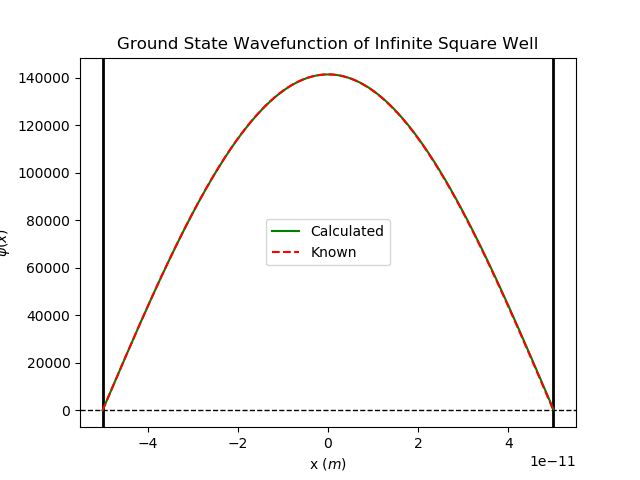

In [12]:
# plots the calculated and known wavefunctions on the same graph
# checking to see if they both match
plt.figure()
plt.xlabel('x $ (m) $')
plt.ylabel('$\psi(x)$')
plt.title('Ground State Wavefunction of Infinite Square Well')
plt.axvline(x=-a,c='k',ls='-',lw=2) # black boundary line at x = -a
plt.axvline(x=a,c='k',ls='-',lw=2) # black boundary line at x = a
plt.axhline(c='k',ls='--',lw=1) # plots dashed black at psi(x) = 0
plt.plot(xpoints, y_calc[0:N], 'g-', label="Calculated")
plt.plot(xpoints, y_known, 'r--', label="Known")
plt.legend(loc='best')

The code cell above has been used to plot the calculated ground state wavefunction against the known ground state wavefunction.

As you can see, the calculated wavefunction perfectly matches the known wavefunction, therefore the method used to obtain the ground state energy, calculate the wavefunction and normalise it, is correct as it obtained very accurate numerical results for the analytically solvable infinite square well.

Therefore since the methods used so far has been success, we will now check that this works for higher energy states such as $ n = 2, 3, 4 $ and a very large $ n $ such as $ n = 20 $.

## Finding the Higher Energy States ##

In [13]:
def wavef_n(n,E_1,E_2):
    '''Function to calculate the energy iteratively, then create an unnormalised wavefunction array
    and finally normalise the wavefunction by dividing the unnormalised wavefunction by the square-root
    of the integral of the modulus-squared (equations (6) and (7)) of the wavefunction.
    Inputs:
    - n = the number of the eigenstate being investigated
    - E_1 = the 1st initial guess of the energy
    - E_2 = the 2nd initial guess of the energy
    Outputs:
    - an array containing the normalised wavefunction for the calculated energy eigenvalue'''

    # new psi and phi values defined inside function
    # since phi is dependent on the value of 'n'
    psi = 0.0 # boundary condition psi = 0 when x = -a, a
    index = np.floor(0.5*n) # power to determine the phase shift of wavefunction
    phi = (-1)**index # initial value of phi
    r1 = [psi, phi] # initial conditions
    
    # iterates the Secant method, same as previously shown
    while abs(E_2-E_1) > tolerance:
        psi1 = RK(r1, xpoints, E_1)
        psi2 = RK(r1, xpoints, E_2)
        # calculates new energy from the 2 initial guesses and final element of psi arrays
        E_3 = E_2 - psi2[-1]*(E_2-E_1)/(psi2[-1]-psi1[-1])
        E_1 = E_2 # E_2 value assigned to E_1
        E_2 = E_3 # E_3 value assigned to E_2 for next iteration

    print("The calculated energy is E = ", E_3, "J")
    print("...which is", E_3/e, "eV\n")
    E_known = ((np.pi**2)*(h_bar**2)*(n**2))/(2*em*(2*a)**2) # calculates known energy
    print("The known n =", n, "energy is", E_known/e, "eV\n")
    print("The % difference is", ((E_3)-(E_known))*100/(E_known), "%")

    psi_n = RK(r1, xpoints, E_3) # calculates wavefunction using energy eigenvalue
    # works out the integral of modulus-squared of wavefunction
    integral = h*(0.5*np.abs(psi_n[0])**2 + 0.5*np.abs(psi_n[-1])**2 + np.sum(np.abs(psi_n[1:-2])**2))
    
    return (psi_n/np.sqrt(integral)) # returns normalised wavefunction

As the higher order energy states will now be calculated, the method will need to be slightly changed. This is because so far we have only calculated the ground state energy and normalised wavefunction. Therefore something needs to be changed to calculate higher energy states.

Upon some experimentation, I noticed that $ \phi $ determines the phase shift of the wavefunction so $ \phi = 1.0 $, which is the initial value used for the ground state, gives a Runge Kutta array of $ \psi(x) $ values that is very similar in shape to the sine curve. Whereas $ \phi = -1.0 $ gives a Runge Kutta array of $ \psi(x) $ values that is similar in shape to the sine curve that has been shifted by $ \pi $ radians, so it is similar to the negative sine ($ -sin(x) $) curve. Therefore by looking at the shapes of the known wavefunctions of $ n = 2, 3, 4 $, I have created an expression that should output an appropriate value of $ \phi $ based on the value of $ n $ inputted.

This expression works by using the value of $ \frac{1}{2}n $ in the 'np.floor()' function, which will round the number inside the function to the next lowest integer. So when $ n = 1 $, 'np.floor($ \frac{1}{2} $)' is rounded down to 0 which gives $ \phi = 1.0 $. But when $ n = 2 $, 'np.floor($ \frac{2}{2} = 1 $)' gives $ \phi = -1.0 $ resulting in the negative sine curve as required. This expression has been tested for multiple values of $ n $ and it has been very accurate.

Furthermore I decided to create a new function which is able to complete each step of the method shown so far, including calculation of the correct $ \phi $ value and energy of the wavefunction, followed by outputting a normalised wavefunction using the calculated energy that can subsequently be plotted on a graph. This function can be seen above defined as 'wavef_n()', and it, along with variations of it, will be used throughout the rest of the notebook frequently.

In [14]:
# calculations of known energies of n = 2, 3, 4 and 20
E_k2 = ((np.pi**2)*(h_bar**2)*(2**2))/(2*em*(2*a)**2)
E_k3 = ((np.pi**2)*(h_bar**2)*(3**2))/(2*em*(2*a)**2)
E_k4 = ((np.pi**2)*(h_bar**2)*(4**2))/(2*em*(2*a)**2)
E_k20 = ((np.pi**2)*(h_bar**2)*(20**2))/(2*em*(2*a)**2)

# printing known energies in terms of eV
print("The known n = 2 energy is", E_k2/e, "eV")
print("The known n = 3 energy is", E_k3/e, "eV")
print("The known n = 4 energy is", E_k4/e, "eV")
print("The known n = 20 energy is", E_k20/e, "eV")

The known n = 2 energy is 150.41206366373632 eV
The known n = 3 energy is 338.42714324340676 eV
The known n = 4 energy is 601.6482546549453 eV
The known n = 20 energy is 15041.20636637363 eV


In the code cell above I have analytically calculated the expected energies of the $ n = 2, 3, 4 $ and $ 20 $ energy states, and printed them in terms of eV. This will be used to find the initial guesses.

Unfortunately I am unable to create a function that will guess some initial guesses, this is because in order to create a function or method that will guess the initial guesses, you would need to have the original value. So I have only been able to get initial guesses, as you can see below, by finding the analytical solutions and subsequently assigning the initial guesses as the known energy plus or minus 10% of the known energy. This will create a range within which the known energy lies, hence the Secant method will be able to iteratively determine the energy.

Due to the very high energy of the $ n = 20 $ state, the initial guesses chosen, as you will see below, are only $ 1 \% $ above and below the known energy. This is because $ 10 \% $ above and below the known energy may include lower or higher energy states resulting in the wrong energy state being calculated.

See below for the energy calculations of the $ n = 2, 3, 4 $ and $ 20 $ eigenstates, including the normalised wavefunction of each being plotted against the known normalised wavefunction, which were worked out using equations (8) or (9).

### $ n = 2 $ ###

The calculated energy is E =  2.409866922579216e-17 J
...which is 150.41206396952765 eV

The known n = 2 energy is 150.41206366373632 eV

The % difference is 2.0330239261359418e-07 %


<IPython.core.display.Javascript object>


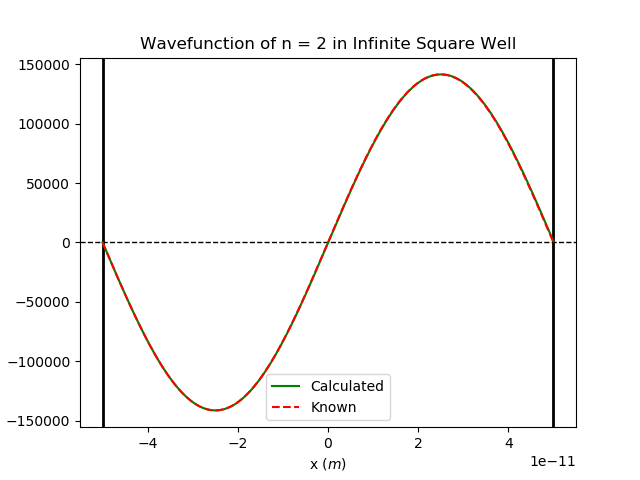

In [15]:
# n = 2 initial guesses based on known energy
E1_n2 = E_k2 - E_k2*0.1
E2_n2 = E_k2 + E_k2*0.1

yn2 = wavef_n(2, E1_n2, E2_n2) # prints calculated energy and outputs normalised wavefunction
yknown2 = (1/np.sqrt(a)*np.sin((2*np.pi*xpoints)/(2*a))) # known n = 2 wavefunction

# plots calculated and known wavefunction of n = 2 eigenstate
plt.figure()
plt.xlabel('x $ (m) $')
plt.ylabel('$\psi(x)$')
plt.title('Wavefunction of n = 2 in Infinite Square Well')
plt.axvline(x=-a,c='k',ls='-',lw=2) # black boundary line at x = -a
plt.axvline(x=a,c='k',ls='-',lw=2) # black boundary line at x = a
plt.axhline(c='k',ls='--',lw=1) # plots dashed black at psi(x) = 0
plt.plot(xpoints, yn2[0:N], 'g-', label="Calculated")
plt.plot(xpoints, yknown2, 'r--', label="Known")
plt.legend(loc='best')

### $ n = 3 $ ###

The calculated energy is E =  5.4222005654927225e-17 J
...which is 338.42714328790555 eV

The known n = 3 energy is 338.42714324340676 eV

The % difference is 1.3148714707442143e-08 %


<IPython.core.display.Javascript object>


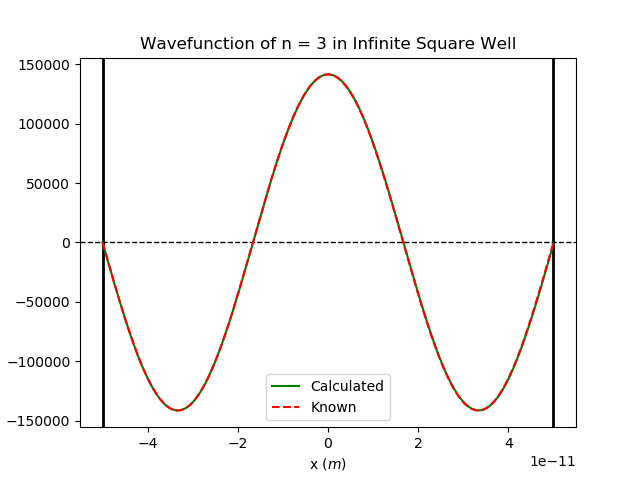

In [16]:
# n = 3 initial guesses based on known energy
E1_n3 = E_k3 - E_k3*0.1
E2_n3 = E_k3 + E_k3*0.1

yn3 = wavef_n(3, E1_n3, E2_n3) # prints calculated energy and outputs normalised wavefunction
yknown3 = (1/np.sqrt(a)*np.cos((3*np.pi*xpoints)/(2*a))) # known n = 3 wavefunction

# plots calculated and known wavefunction of n = 3 eigenstate
plt.figure()
plt.xlabel('x $ (m) $')
plt.ylabel('$\psi(x)$')
plt.title('Wavefunction of n = 3 in Infinite Square Well')
plt.axvline(x=-a,c='k',ls='-',lw=2) # black boundary line at x = -a
plt.axvline(x=a,c='k',ls='-',lw=2) # black boundary line at x = a
plt.axhline(c='k',ls='--',lw=1) # plots dashed black at psi(x) = 0
plt.plot(xpoints, yn3[0:N], 'g-', label="Calculated")
plt.plot(xpoints, yknown3, 'r--', label="Known")
plt.legend(loc='best')

### $ n = 4 $ ###

The calculated energy is E =  9.639467674725434e-17 J
...which is 601.64825490497 eV

The known n = 4 energy is 601.6482546549453 eV

The % difference is 4.1556632365401015e-08 %


<IPython.core.display.Javascript object>


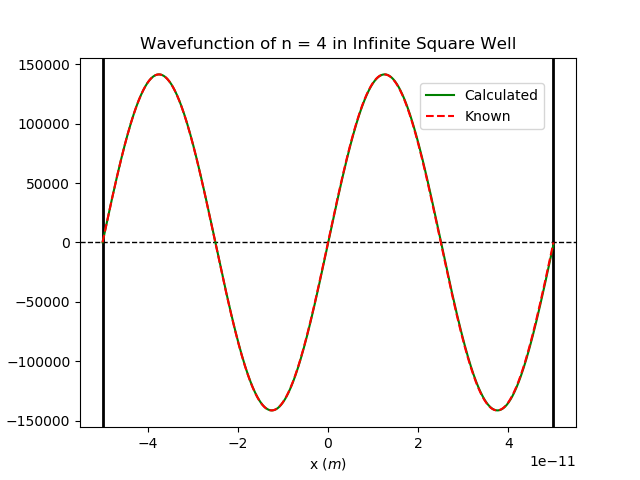

In [17]:
# n = 4 initial guesses
E1_n4 = E_k4 - E_k4*0.1
E2_n4 = E_k4 + E_k4*0.1

yn4 = wavef_n(4, E1_n4, E2_n4) # prints calculated energy and outputs normalised wavefunction
yknown4 = (1/np.sqrt(a)*np.sin((4*np.pi*xpoints)/(2*a))) # known n = 4 wavefunction

# plots calculated and known wavefunction of n = 4 eigenstate
plt.figure()
plt.xlabel('x $ (m) $')
plt.ylabel('$\psi(x)$')
plt.title('Wavefunction of n = 4 in Infinite Square Well')
plt.axvline(x=-a,c='k',ls='-',lw=2) # black boundary line at x = -a
plt.axvline(x=a,c='k',ls='-',lw=2) # black boundary line at x = a
plt.axhline(c='k',ls='--',lw=1) # plots dashed black at psi(x) = 0
plt.plot(xpoints, yn4[0:N], 'g-', label="Calculated")
plt.plot(xpoints, yknown4, 'r--', label="Known")
plt.legend(bbox_to_anchor=(0.95, 0.95)) # legend located at top right of plot

### $ n = 20 $ ###

The calculated energy is E =  2.4098675427791624e-15 J
...which is 15041.210267936392 eV

The known n = 20 energy is 15041.20636637363 eV

The % difference is 2.5939161173045806e-05 %


<IPython.core.display.Javascript object>


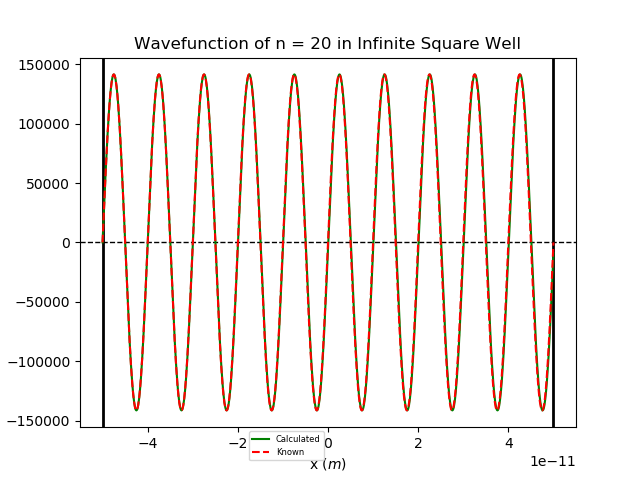

In [18]:
# n = 20 initial guesses
E1_n20 = E_k20 - E_k20*0.01
E2_n20 = E_k20 + E_k20*0.01

yn20 = wavef_n(20, E1_n20, E2_n20) # prints calculated energy and outputs normalised wavefunction
yknown20 = (1/np.sqrt(a)*np.sin((20*np.pi*xpoints)/(2*a))) # known n = 20 wavefunction

# plots calculated and known wavefunction of n = 20 eigenstate
plt.figure()
plt.xlabel('x $ (m) $')
plt.ylabel('$\psi(x)$')
plt.title('Wavefunction of n = 20 in Infinite Square Well')
plt.axvline(x=-a,c='k',ls='-',lw=2) # black boundary line at x = -a
plt.axvline(x=a,c='k',ls='-',lw=2) # black boundary line at x = a
plt.axhline(c='k',ls='--',lw=1) # plots dashed black at psi(x) = 0
plt.plot(xpoints, yn20[0:N], 'g-', label="Calculated")
plt.plot(xpoints, yknown20, 'r--', label="Known")
plt.legend(bbox_to_anchor=(0.5, 0), prop={'size':6}) # small legend located at bottom of plot

As you can see from the 4 code cells above, I have used the initial guesses of the energy with the previously defined 'wavef_n' function to output the calculated energy in eV and the normalised wavefunction. The known energy of each eigenstate has also been outputted below the calculated energy, in addition to calculating the percentage difference between them. Then the calculated wavefunction has been plotted on the same graph as the known wavefunction. From each graph it is clear to see that each calculated wavefunction matches the known wavefunction perfectly. Furthermore by comparing the calculated and known energies by using the $ \% $ difference, you can see that the correct energies have been iteratively obtained because the $ \% $ difference between the 2 values is in the order of $ 10^{-5} \% $ to $ 10^{-8} \% $, which is a very small difference. Therefore this verifies that the method used to obtain energy eigenvalues and normalised wavefuctions for these eigenstates is correct, and can now be used for potentials that are not easily solvable analytically.

# Infinite "Unsquare" Well #

## Harmonic Potential ##

Now that the iterative method of numerically solving for the energies of eigenstates has been successfully carried out, we shall now be moving onto different bases for the potential well. The 1st of which will be the harmonic potential, for which I will be calculating at least the 3 lowest eigenstates and plotting the wavefunctions for each of these eigenstates on the same graph.

Note also that the ground state within the infinite square well with the harmonic function starts at $ n = 0 $ rather than the $ n = 1 $ that we have been using so far, so the 'wavef_n' function will need to be slightly altered in order to avoid an error due to this change.

The wavefunction of a 1D quantum harmonic oscillator [2] is shown below:

$$
\psi_n(x) = \frac{1}{\sqrt{2^n n!}}({\frac{m \omega}{\pi \hbar}})^{1/4} e^{-\frac{m \omega x^2}{2 \hbar}} H_n(\sqrt{\frac{m \omega}{\hbar}}x) \quad n=0, 1, 2, 3, 4,...
$$

where $ H_n $ are known as the Hermite polynomials.

The harmonic potential has the form shown below:

$$
V(x) = V_0 \frac{x^2}{a^2} \quad (10)
$$

within the infinite square well, which has a shape similar to that which is shown in Figure 2 below.

Energy of harmonic potential is given by the equation below:

$$ E_n = \hbar\omega(n+\frac{1}{2}) \quad (11) $$

where $ \omega = \sqrt{\frac{2V_0}{ma^2}} \quad (12) $.

I will not be calculating the known wavefunctions for the harmonic potential due to the complexity of the known wavefunction. Instead we shall be comparing the known and calculated energy eigenvalues to see whether the numerical method accurately gives the energy of each eigenstate. This will be done whilst changing the boundary potential $ V_0 $ to see its effect.

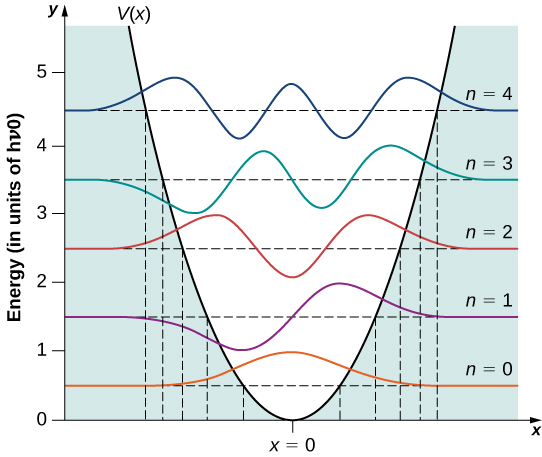

In [19]:
# Figure 2 - Wavefunctions within a harmonic potential [3]
Image('https://cnx.org/resources/da589c2ca5119faabbadedab0abc12cdb56f0166/CNX_UPhysics_40_05_states.jpg')

In [20]:
def V(x):
    '''2nd function for the potential in the infinite square well. This is the harmonic potential
    and has the form shown by equation (10) above. The potential is infinity outside of the well,
    same as previously.
    Input: a value or array of x points
    Output: V, the potential at a given x point depending on value of V0 and a'''
    
    V = V0*((x**2)/(a**2)) # works out the value(s) of the potential, V, at x point(s)
    
    return V # returns the value or array of values for harmonic potential

The code cell above contains the harmonic potential function that will be used for this section. As you can see equation (10) given above is the equation that is used to define the harmonic potential.

In [21]:
def harmonic(n,E_1,E_2):
    '''Function to calculate the energy iteratively for a system with harmonic potential
    then create an unnormalised wavefunction array, and finally normalise the wavefunction
    by dividing the unnormalised wavefunction by the square-root of the integral of the
    modulus-squared (equations (6) and (7)) of the wavefunction.
    Inputs:
    - n = the number of the eigenstate being investigated
    - E_1 = the 1st initial guess of the energy
    - E_2 = the 2nd initial guess of the energy
    Outputs:
    - an array containing the normalised wavefunction for energy eigenvalue calculated'''

    # new psi and phi values defined inside function
    # since phi is dependent on the value of 'n'
    psi = 0.0 # boundary condition psi = 0 when x = -a, a
    index = np.floor(0.5*n) # determines the phase shift of wavefunction
    phi = (-1)**index # initial value of phi
    r1 = [psi, phi] # initial conditions
    
    # iterates the Secant method, same as previously shown
    # new energy calculated and then
    while abs(E_2-E_1) > tolerance:
        psi1 = RK(r1, xpoints, E_1)
        psi2 = RK(r1, xpoints, E_2)
        # calculates new energy from 2 initial guesses and final element of psi arrays
        E_3 = E_2 - psi2[-1]*(E_2-E_1)/(psi2[-1]-psi1[-1])
        E_1 = E_2 # E_2 value assigned to E_1
        E_2 = E_3 # E_3 value assigned to E_2 for next iteration
        
    print("The calculated energy is E = ", E_3, "J")
    print("...which is", E_3/e, "eV")
    omega = np.sqrt((2*V0)/(em*a**2)) # works out omega to calculate known energy
    E_known = h_bar*omega*(n+0.5) # calculates known energy
    print("The known n =", n, "energy is", E_known/e, "eV\n")
    print("The % difference is", ((E_3)-(E_known))*100/(E_known), "%\n")

    psi_n = RK(r1, xpoints, E_3) # calculates wavefunction using energy eigenvalue
    # works out the integral of modulus-squared of wavefunction
    integral = h*(0.5*np.abs(psi_n[0])**2 + 0.5*np.abs(psi_n[-1])**2 + np.sum(np.abs(psi_n[1:-2])**2))
    
    return (psi_n/np.sqrt(integral)) # returns normalised wavefunction

In the code cell above I have reused the 'wavef_n' function defined in the previous section and named it 'harmonic', as it will make the process of calculating the energy, outputting the normalised wavefunction for that energy and comparing the calculated and known energies, much more efficient. This is because after defining this function, I will only need to use 1 line of code in order to calculate all the things mentioned above.

The difference in this function is that the calculation of the known energy is different, as harmonic potentials use a different equation to calculate the known energy, given by equations (11) and (12) above. The rest of the function is the same as 'wavef_n'. This is why a new function had to be defined.

### $ V_0 = 800\:eV $ ###

<IPython.core.display.Javascript object>


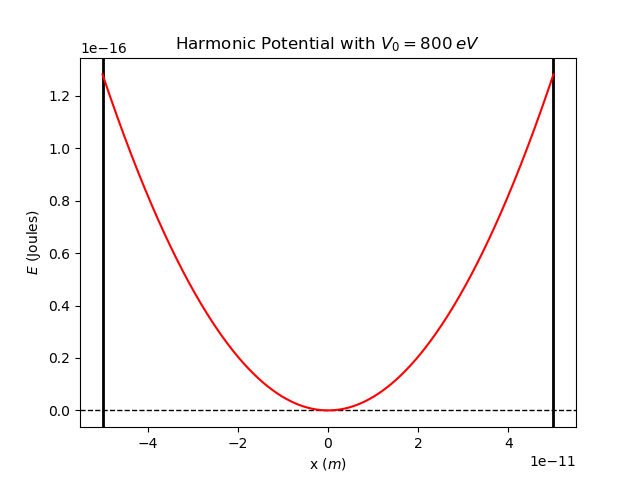

In [22]:
V0 = 800*e # Starting potential in JOULES (J)
omega = np.sqrt((2*V0)/(em*a**2)) # omega shown by equation (12)

# plotting the harmonic potential for V0 = 800 eV to see its shape
plt.figure()
plt.xlabel('x $ (m) $')
plt.ylabel('$E$ (Joules)')
plt.title('Harmonic Potential with $ V_0 = 800\:eV $')
plt.axvline(x=-a,c='k',ls='-',lw=2) # black boundary line at x = -a
plt.axvline(x=a,c='k',ls='-',lw=2) # black boundary line at x = a
plt.axhline(c='k',ls='--',lw=1) # plots dashed black at psi(x) = 0
plt.plot(xpoints, V(xpoints), 'r')

In [23]:
# known energies of harmonic potential
E_0 = h_bar*omega*(0+0.5)
E_1 = h_bar*omega*(1+0.5)
E_2 = h_bar*omega*(2+0.5)
E_3 = h_bar*omega*(3+0.5)

# print known energies in terms of eV
print("The known n = 0 energy is", E_0/e, "eV")
print("The known n = 1 energy is", E_1/e, "eV")
print("The known n = 2 energy is", E_2/e, "eV")
print("The known n = 3 energy is", E_3/e, "eV")

The known n = 0 energy is 110.41713028147917 eV
The known n = 1 energy is 331.25139084443754 eV
The known n = 2 energy is 552.0856514073959 eV
The known n = 3 energy is 772.9199119703542 eV


In [24]:
# calculating the initial guesses for each eigenstate
# n = 0 eigenstate
E1_h0 = E_0 - E_0*0.1
E2_h0 = E_0 + E_0*0.1

# n = 1 eigenstate
E1_h1 = E_1 - E_1*0.1
E2_h1 = E_1 + E_1*0.1

# n = 2 eigenstate
E1_h2 = E_2 - E_2*0.1
E2_h2 = E_2 + E_2*0.1

# n = 3 eigenstate
E1_h3 = E_3 - E_3*0.1
E2_h3 = E_3 + E_3*0.1

The calculated energy is E =  1.777864471243213e-17 J
...which is 110.96557327388868 eV
The known n = 0 energy is 110.41713028147917 eV

The % difference is 0.49670100192913497 %

The calculated energy is E =  5.397917706098096e-17 J
...which is 336.9115264020078 eV
The known n = 1 energy is 331.25139084443754 eV

The % difference is 1.7087129938205552 %

The calculated energy is E =  9.307327601819577e-17 J
...which is 580.9177019334844 eV
The known n = 2 energy is 552.0856514073959 eV

The % difference is 5.22238722426293 %

The calculated energy is E =  1.3862575495045541e-16 J
...which is 865.2339150377529 eV
The known n = 3 energy is 772.9199119703542 eV

The % difference is 11.94354054510883 %



<IPython.core.display.Javascript object>


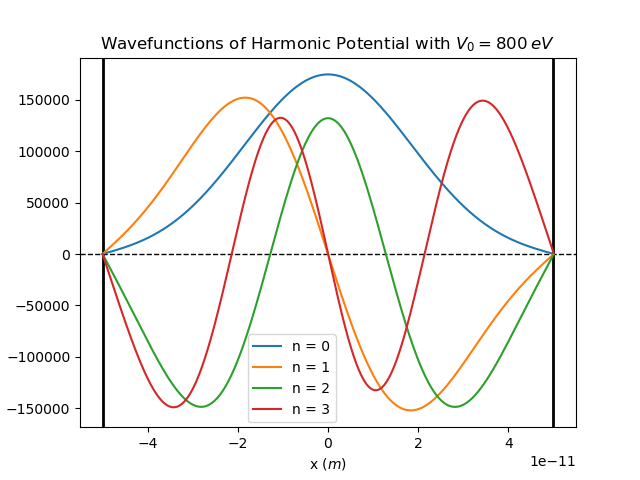

In [25]:
# working out the normalised wavefunctions for eigenstates
# calculated and known energies are printed
# percentage difference between energies is given as well
yh0 = harmonic(0, E1_h0, E2_h0)
yh1 = harmonic(1, E1_h1, E2_h1)
yh2 = harmonic(2, E1_h2, E2_h2)
yh3 = harmonic(3, E1_h3, E2_h3)

# plotting each normalised wavefunction on same graph
plt.figure()
plt.xlabel('x $ (m) $')
plt.ylabel('$\psi(x)$')
plt.title('Wavefunctions of Harmonic Potential with $ V_0 = 800\:eV $')
plt.axvline(x=-a,c='k',ls='-',lw=2) # black boundary line at x = -a
plt.axvline(x=a,c='k',ls='-',lw=2) # black boundary line at x = a
plt.axhline(c='k',ls='--',lw=1) # plots dashed black at psi(x) = 0
plt.plot(xpoints, yh0[0:N], label="n = 0")
plt.plot(xpoints, yh1[0:N], label="n = 1")
plt.plot(xpoints, yh2[0:N], label="n = 2")
plt.plot(xpoints, yh3[0:N], label="n = 3")
plt.legend(bbox_to_anchor=(0.53, 0.27))

In the code cell above I have used the 'harmonic' function that has been defined at the beginning of this section to output, for eigenstates $ n = 0, 1, 2, 3 $, the calculated and known energies as well as the percentage difference between them. For $ V_0 = 800\:eV $, as the energy of the eigenstate increases, the percentage difference between the calculated and known energies increases as well. This suggests that the iterative process does work to find the energy, but the accuracy of the value decreases with increasing eigenstate.

For the $ n = 0 $ eigenstate, the $ \Delta\% = 0.497\% $ whereas for the eigenstate $ n = 3 $, the $ \Delta\% = 11.944\% $. This is a big decrease in the accuracy of energy values. So as energy of the eigenstate increases, the accuracy of the iteratively calculated energy to the actual energy decreases.

By looking at Figure 2 above, we can compare the general shapes of the expected wavefunctions with the calculated wavefunctions. The general shapes of the wavefunctions do match, however the orientations of some wavefunctions aren't the same, as they appear to be reflected in the line $ \psi(x) = 0 $.

As $ x \rightarrow a $ or $ x \rightarrow -a $, the amplitude of the wavefunctions tend to zero, $ \psi(x) \rightarrow 0 $, as expected when the potential becomes infinite as it does at the boundaries of the potential well. This means that probability of finding the particle beyond the boundaries is zero.

Comparing the ground state of the harmonic potential with the infinite square well, the influence of the harmonic potential becomes much clearer. At and around the peak ($ x = 0 $) of the ground state wavefunction, the shapes of the 2 wavefunctions are very much the same. However as the x position deviates from the centre, the gradient becomes steeper much faster than in the infinite square well, as well as the gradient then decreasing in value as the value of x becomes more positive or negative. The gradient of the ground state in the harmonic potential well close to the boundaries is much shallower and at a much lower $ \psi(x) $ value than that of the infinite square well ground state. This suggests that the probability of finding the particle close to walls in harmonic potential well is lower than that of the infinite square well.

### $ V_0 = 400\:eV $ ###

Now let us change the boundary potential from $ V_0 = 800\:eV $ to $ V_0 = 400\:eV $, and I shall repeat what I have just done to see what changes we can observe.

<IPython.core.display.Javascript object>


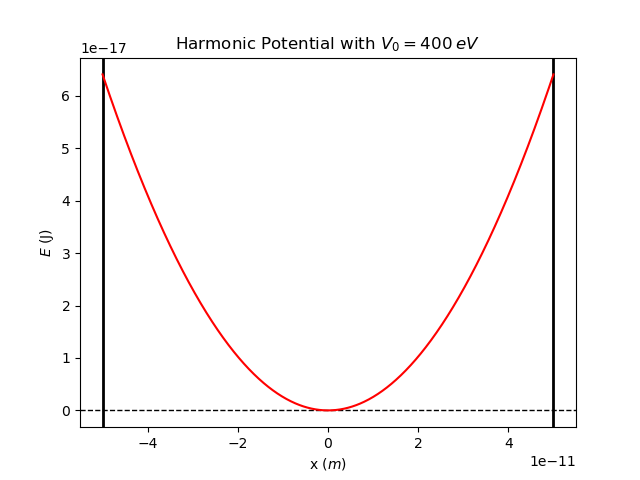

In [26]:
V0 = 400*e # Starting potential in JOULES (J)
omega = np.sqrt((2*V0)/(em*a**2)) # omega shown by equation (12)

# plotting the harmonic potential for V0 = 400 eV to see its shape
plt.figure()
plt.xlabel('x $ (m) $')
plt.ylabel('$E$ (J)')
plt.title('Harmonic Potential with $ V_0 = 400\:eV $')
plt.axvline(x=-a,c='k',ls='-',lw=2) # black boundary line at x = -a
plt.axvline(x=a,c='k',ls='-',lw=2) # black boundary line at x = a
plt.axhline(c='k',ls='--',lw=1) # plots dashed black at psi(x) = 0
plt.plot(xpoints, V(xpoints), 'r')

In [27]:
# known energies of harmonic potential
E_0 = h_bar*omega*(0+0.5)
E_1 = h_bar*omega*(1+0.5)
E_2 = h_bar*omega*(2+0.5)

# print known energies in terms of eV
print("The known n = 0 energy is", E_0/e, "eV")
print("The known n = 1 energy is", E_1/e, "eV")
print("The known n = 2 energy is", E_2/e, "eV")

The known n = 0 energy is 78.07670158119241 eV
The known n = 1 energy is 234.23010474357721 eV
The known n = 2 energy is 390.383507905962 eV


In [28]:
# calculating the initial guesses for each eigenstate
# n = 0 eigenstate
E1_h0 = E_0 - E_0*0.1
E2_h0 = E_0 + E_0*0.1

# n = 1 eigenstate
E1_h1 = E_1 - E_1*0.1
E2_h1 = E_1 + E_1*0.1

# n = 2 eigenstate
E1_h2 = E_2 - E_2*0.001
E2_h2 = E_2 + E_2*0.001

The calculated energy is E =  1.2863393203249129e-17 J
...which is 80.28698610799306 eV
The known n = 0 energy is 78.07670158119241 eV

The % difference is 2.8309143214793333 %

The calculated energy is E =  4.049918645691401e-17 J
...which is 252.77604198789274 eV
The known n = 1 energy is 234.23010474357721 eV

The % difference is 7.917828182085583 %

The calculated energy is E =  7.41650794128224e-17 J
...which is 462.90202020812404 eV
The known n = 2 energy is 390.383507905962 eV

The % difference is 18.57622333770073 %



<IPython.core.display.Javascript object>


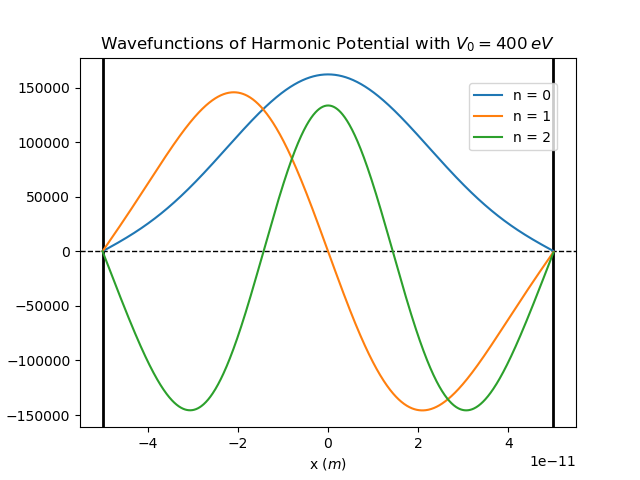

In [29]:
# working out the normalised wavefunctions for eigenstates
# calculated and known energies are printed
# percentage difference between energies is given as well
yh0 = harmonic(0, E1_h0, E2_h0)
yh1 = harmonic(1, E1_h1, E2_h1)
yh2 = harmonic(2, E1_h2, E2_h2)

# plotting each normalised wavefunction on same graph
plt.figure()
plt.xlabel('x $ (m) $')
plt.ylabel('$\psi(x)$')
plt.title('Wavefunctions of Harmonic Potential with $ V_0 = 400\:eV $')
plt.axvline(x=-a,c='k',ls='-',lw=2) # black boundary line at x = -a
plt.axvline(x=a,c='k',ls='-',lw=2) # black boundary line at x = a
plt.axhline(c='k',ls='--',lw=1) # plots dashed black at psi(x) = 0
plt.plot(xpoints, yh0[0:N], label="n = 0")
plt.plot(xpoints, yh1[0:N], label="n = 1")
plt.plot(xpoints, yh2[0:N], label="n = 2")
plt.legend(bbox_to_anchor=(0.77, 0.73))

In the code cell above I have used the 'harmonic' function for $ V_0 = 400\:eV $. The same pattern as for the $ V_0 = 800\:eV $ follows here, since as the energy of the eigenstate increases, the percentage difference between the calculated and known energies increases. However compared to the previous $ V_0 $, the percentage difference increases much faster.

For the $ n = 0 $ eigenstate, the $ \Delta\% = 2.831\% $ whereas for the eigenstate $ n = 2 $, the $ \Delta\% = 18.576\% $. This is a much bigger difference and for a smaller eigenstate than for $ V_0 = 800\:eV $. Since the only change between the 2 calculations is the halving of $ V_0 $. This suggests that lower boundary potentials ($ V_0 $) result in more inaccurate iterative calculations of the energy, hence the numerically obtained approximation of the energy is not reliable. This inaccuracy is exacerbated when attempting to calculate energy eigenvalues for higher order eigenstates.

Once again comparison of the graph above to Figure 2 above, shows that the general shapes of the wavefunctions agree. Furthermore the calculated wavefunctions do satisfy the boundary conditions, as required. However, same as before, the orientations of some wavefunctions aren't the same, as they appear to be reflected in the line $ \psi(x) = 0 $.

Due to a smaller boundary potential than the previous example, the gradient of the ground state wavefunction on either side of the peak is much shallower and gradually decreases to zero. This means that the gradient very close to the boundaries is slightly steeper than the previous example where the gradient was steeper close to the peak. This means that the probability of finding the particle close to the walls of the potential well is greater for the lower $ V_0 $.

### $ V_0 = 1600\:eV $ ###

Now we will see the effect of doing the opposite by doubling the boundary potential from $ V_0 = 800\:eV $ to $ V_0 = 1600\:eV $. My prediction is that the percentage difference between the calculated and known energy values will decrease to lower than that of $ V_0 = 800e $. However I predict that the percentage difference will still increase for higher order eigenstates, as seen before.

<IPython.core.display.Javascript object>


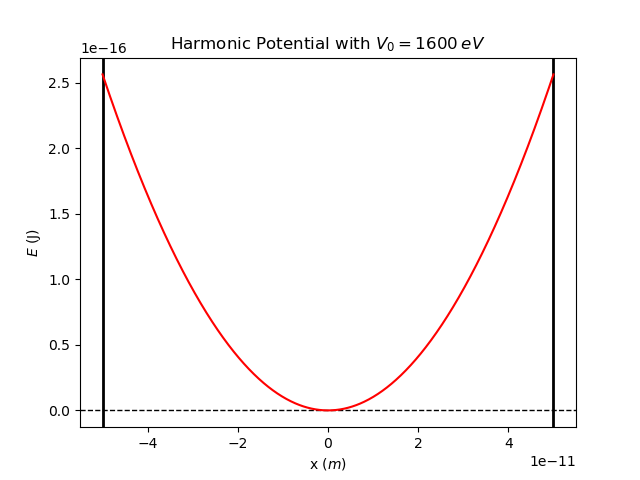

In [30]:
V0 = 1600*e # Starting potential in JOULES (J)
omega = np.sqrt((2*V0)/(em*a**2)) # omega shown by equation (12)

# plotting the harmonic potential for V0 = 1600 eV to see its shape
plt.figure()
plt.xlabel('x $ (m) $')
plt.ylabel('$E$ (J)')
plt.title('Harmonic Potential with $ V_0 = 1600\:eV $')
plt.axvline(x=-a,c='k',ls='-',lw=2) # black boundary line at x = -a
plt.axvline(x=a,c='k',ls='-',lw=2) # black boundary line at x = a
plt.axhline(c='k',ls='--',lw=1) # plots dashed black at psi(x) = 0
plt.plot(xpoints, V(xpoints), 'r')

In [31]:
# known energies of harmonic potential
E_0 = h_bar*omega*(0+0.5)
E_1 = h_bar*omega*(1+0.5)
E_2 = h_bar*omega*(2+0.5)
E_3 = h_bar*omega*(3+0.5)

# print known energies in terms of eV
print("The known n = 0 energy is", E_0/e, "eV")
print("The known n = 1 energy is", E_1/e, "eV")
print("The known n = 2 energy is", E_2/e, "eV")
print("The known n = 3 energy is", E_3/e, "eV")

The known n = 0 energy is 156.15340316238482 eV
The known n = 1 energy is 468.46020948715443 eV
The known n = 2 energy is 780.767015811924 eV
The known n = 3 energy is 1093.0738221366937 eV


In [32]:
# calculating the initial guesses for each eigenstate
# n = 0 eigenstate
E1_h0 = E_0 - E_0*0.1
E2_h0 = E_0 + E_0*0.1

# n = 1 eigenstate
E1_h1 = E_1 - E_1*0.1
E2_h1 = E_1 + E_1*0.1

# n = 2 eigenstate
E1_h2 = E_2 - E_2*0.1
E2_h2 = E_2 + E_2*0.1

# n = 3 eigenstate
E1_h3 = E_3 - E_3*0.1
E2_h3 = E_3 + E_3*0.1

The calculated energy is E =  2.5049584792362047e-17 J
...which is 156.3472121591816 eV
The known n = 0 energy is 156.15340316238482 eV

The % difference is 0.12411448797899832 %

The calculated energy is E =  7.523936455658387e-17 J
...which is 469.60718074006013 eV
The known n = 1 energy is 468.46020948715443 eV

The % difference is 0.24483856465874929 %

The calculated energy is E =  1.2608079110128796e-16 J
...which is 786.934408650202 eV
The known n = 2 energy is 780.767015811924 eV

The % difference is 0.7899146241295277 %

The calculated energy is E =  1.7932201021746628e-16 J
...which is 1119.2399638029062 eV
The known n = 3 energy is 1093.0738221366937 eV

The % difference is 2.39381285474975 %



<IPython.core.display.Javascript object>


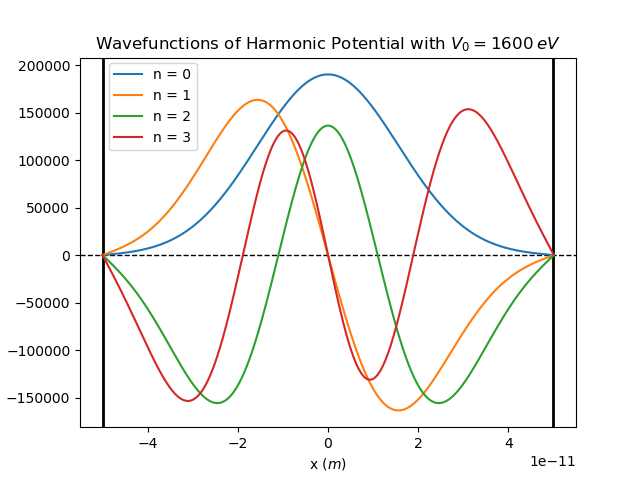

In [33]:
# working out the normalised wavefunctions for eigenstates
# calculated and known energies are printed
# percentage difference between energies is given as well
yh0 = harmonic(0, E1_h0, E2_h0)
yh1 = harmonic(1, E1_h1, E2_h1)
yh2 = harmonic(2, E1_h2, E2_h2)
yh3 = harmonic(3, E1_h3, E2_h3)

# plotting each normalised wavefunction on same graph
plt.figure()
plt.xlabel('x $ (m) $')
plt.ylabel('$\psi(x)$')
plt.title('Wavefunctions of Harmonic Potential with $ V_0 = 1600\:eV $')
plt.axvline(x=-a,c='k',ls='-',lw=2) # black boundary line at x = -a
plt.axvline(x=a,c='k',ls='-',lw=2) # black boundary line at x = a
plt.axhline(c='k',ls='--',lw=1) # plots dashed black at psi(x) = 0
plt.plot(xpoints, yh0[0:N], label="n = 0")
plt.plot(xpoints, yh1[0:N], label="n = 1")
plt.plot(xpoints, yh2[0:N], label="n = 2")
plt.plot(xpoints, yh3[0:N], label="n = 3")
plt.legend(bbox_to_anchor=(0.25, 0.73))

In the code cell above I have, once again, used the 'harmonic' function for $ V_0 = 1600\:eV $. The prediction I made when choosing to do this boundary potential, has been shown to be correct. This is because as the energy of the eigenstate increases, the percentage difference between the calculated and known energies increases, as established twice before. However compared to the previous boundary potentials, the percentage difference is greatly reduced for the lowest 4 eigenstates.

For the $ n = 0 $ eigenstate, the $ \Delta\% = 0.124\% $ whereas for the eigenstate $ n = 3 $, the $ \Delta\% = 2.394\% $. This is a significantly smaller difference between the calculated and known energy for the highest eigenstate included. Therefore doubling the boundary potential from the original, has provided much more accurate iterative calculations, and as a result of this the numerically obtained approximation of the energy is much more reliable. Hence it is safe to conclude that the higher the boundary potential for harmonic potentials, the more accurate the numerical method will be at giving the energy eigenvalue for the given eigenstate.

Comparison of the graph above to Figure 2, shows that the general shapes of the wavefunctions once again agree as expected. Furthermore the calculated wavefunctions do satisfy the boundary conditions, as required. However, once again, the orientations of some wavefunctions aren't the same, as they appear to be reflected in the line $ \psi(x) = 0 $.

The gradient of the ground state wavefunction on either side of the peak is much steeper and the $ \psi(x) $ value decreases much more quickly to zero than the $ V_0 = 800\:eV $. This means that the probability of finding the particle close to the walls of the infinite square well containing a harmonic potential is much smaller for higher $ V_0 $.

## Finite Square Well ##

Now that we have completed calculating energies and plotting wavefunctions for the harmonic potential, we can move onto doing the same for another base for our potential well. This 2nd potential will be that of the finite square well, for which I will once again be calculating at least the 3 lowest eigenstates and plotting the wavefunctions for each of these eigenstates on the same graph.

Note also that the ground state within the finite square well is $ n = 1 $ rather than $ n = 0 $, which was the ground state for the harmonic potential. Furthermore unlike the infinite square well, the accepted energy levels within a finite square well cannot be solved analytically, hence it will not be possible to compare the calculated energies against the known energies. Due to this, we will be defining another function that is very similar to the 'wavef_n' and 'harmonic' functions previously defined, except now there will be no calculation of the known energy. Hence the percentage difference between the known and calculated energies cannot be worked out, meaning that we will not be able to see how accurate the iterative process has been in deducing the correct energy eigenvalues for the finite square well.

As mentioned above, the solutions cannot be obtained analytically. However this presents a problem, as so far the known solutions have been used to deduce 2 initial guesses of the energy that are slightly above and below the known energy, however now we cannot do this anymore. Therefore we shall be employing an essential form of problem-solving, trial and error. So in order to work out the energy eigenvalue for specific eigenstates, I will be guessing initial energy guesses which will iteratively narrow down the value to a final energy value. Then this will be plotted on a graph to see whether the shape for the eigenstate is what we would expect for the finite square well. If not, then the energy guesses will be changed until the correct shape of wavefunction is achieved.

The finite square well potential has the form shown below:

$$
V_x = \begin{cases} 0 & \text{if } -a/2 \leq x \leq +a/2, \\ 
    V_0  & \text{if } |x| > a/2, \end{cases} 
$$

This exists within the walls of the infinite square well.

I will be first use the original boundary potential, then I will change the boundary potential and finally I will use the original boundary potential of $ V_0 = 800e $, whilst changing the width of the potential well.

In [34]:
def V(x):
    '''3rd function for the potential within the infinite square well. The potential is 0.0 within the
    range of -a/2 <= x <= a/2, and for |x| > a/2, the potential is V0.
    As always the potential for |x| > a is infinity.
    Input: a value of x
    Output: V, the potential dependent on x position'''
    
    # if loop to determine what the potential will be at a given x position            
    if -a/2 <= x <= a/2: # V = 0 when |x|<=a/2
        V = 0
    elif np.abs(x) > a/2: # V = V0 when |x|>a/2
        V = V0

    return V # returns value of potential depending on x value

In the code cell above I have defined a new function that contains the finite square well potential.

In [35]:
def finite(n,E_1,E_2):
    '''Function to calculate the energy iteratively for a system within a finite square well
    then create an unnormalised wavefunction array and finally normalise the wavefunction
    by dividing the unnormalised wavefunction by the square-root of the integral of the
    modulus-squared (equations (6) and (7)) of the wavefunction.
    Inputs:
    - n = the number of the eigenstate being investigated
    - E_1 = the 1st initial guess of the energy
    - E_2 = the 2nd initial guess of the energy
    Outputs:
    - an array containing the normalised wavefunction for energy eigenvalue calculated'''

    # new psi and phi values defined inside function
    # since phi is dependent on the value of 'n'
    psi = 0.0 # boundary condition psi = 0 when x = -a, a
    index = np.floor(0.5*n) # determines the phase shift of wavefunction
    phi = (-1)**index # initial value of phi
    r1 = [psi, phi] # initial conditions
    
    # iterates the Secant method, same as previously shown
    # new energy calculated and then
    while abs(E_2-E_1) > tolerance:
        psi1 = RK(r1, xpoints, E_1)
        psi2 = RK(r1, xpoints, E_2)
        # calculates new energy from 2 initial guesses and final element of psi arrays
        E_3 = E_2 - psi2[-1]*(E_2-E_1)/(psi2[-1]-psi1[-1])
        E_1 = E_2 # E_2 value assigned to E_1
        E_2 = E_3 # E3 value assigned to E2 for next iteration
        
    print("The calculated energy is E = ", E_3, "J")
    print("...which is", E_3/e, "eV\n")

    psi_n = RK(r1, xpoints, E_3) # calculates wavefunction using energy eigenvalue
    # works out the integral of modulus-squared of wavefunction
    integral = h*(0.5*np.abs(psi_n[0])**2 + 0.5*np.abs(psi_n[-1])**2 + np.sum(np.abs(psi_n[1:-2])**2))
    
    return (psi_n/np.sqrt(integral)) # returns normalised wavefunction

Using the function in the code cell above will make the calculation of energies and the normalised wavefunction much more efficient. The function above is very similar to the 'wavef_n' and 'harmonic' functions encountered earlier in the notebook, except this function does not contain equations to give the known energies for the finite square well. This is because the solutions to the finite square well cannot be obtain analytically, so the only other ways to find solutions is to solve graphically, or numerically as we will be doing below.

### $ V_0 = 800\:eV $ ###

<IPython.core.display.Javascript object>


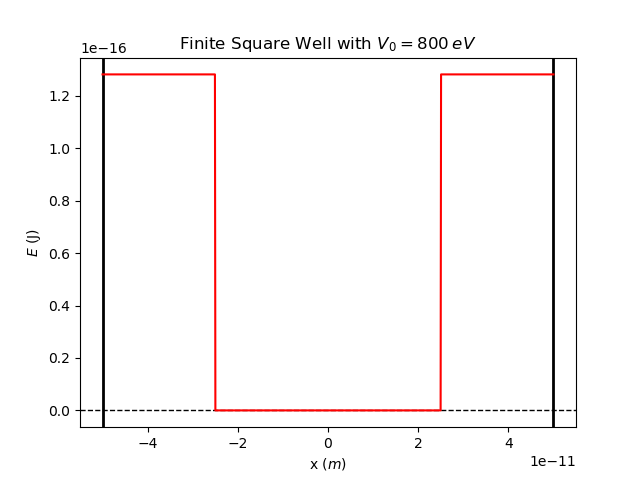

In [36]:
V0 = 800*e # Starting potential in JOULES (J)

V1 = [] # empty array for potentials of finite square well
for i in xpoints:
    if -a/2 <= i <= a/2: # V = 0 when |x|<=a/2
        V1.append(0)
    elif np.abs(i) > a/2: # V = V0 when |x|>a/2
        V1.append(V0)

# plotting the finite square well for V0 = 800 eV to see its shape
plt.figure()
plt.xlabel('x $ (m) $')
plt.ylabel('$E$ (J)')
plt.title('Finite Square Well with $ V_0 = 800\:eV $')
plt.axvline(x=-a,c='k',ls='-',lw=2) # black boundary line at x = -a
plt.axvline(x=a,c='k',ls='-',lw=2) # black boundary line at x = a
plt.axhline(c='k',ls='--',lw=1) # plots fine black at psi(x) = 0
plt.plot(xpoints, V1, 'r')

The code cell above contains the code required to plot the finite square well for $ V_0 = 800\:eV $. Due to how the potential function is defined previously, I am unable to plot the finite square well using the defined potential function as I get the error "*The truth value of an array with more than one element is ambiguous*". Therefore I have created an 'if' loop that will create an array of potentials using the 'xpoints' array, that can then be successfully plotted as shown above.

The calculated energy is E =  1.471503813660516e-17 J
...which is 91.8440448632009 eV

The calculated energy is E =  5.712068996902347e-17 J
...which is 356.5193078964257 eV

The calculated energy is E =  1.1945234159777527e-16 J
...which is 745.5628805629136 eV

The calculated energy is E =  1.791534121921998e-16 J
...which is 1118.1876576890743 eV



<IPython.core.display.Javascript object>


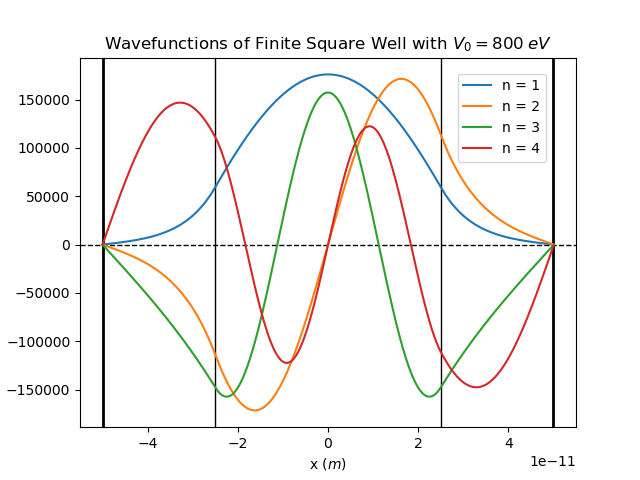

In [37]:
# the energy guesses below were deduced through trial and error
# if wrong energy value deduced, the guesses are altered
# the energy eigenvalues are not known
yh1 = finite(1, 0*e, 100*e)
yh2 = finite(2, 100*e, 400*e)
yh3 = finite(3, 400*e, 700*e)
yh4 = finite(4, 700*e, 1000*e)

# plotting each normalised wavefunction on same graph
plt.figure()
plt.xlabel('x $ (m) $')
plt.ylabel('$\psi(x)$')
plt.title('Wavefunctions of Finite Square Well with $ V_0 = 800\:eV $')
plt.axvline(x=-a,c='k',ls='-',lw=2) # black boundary line at x = -a
plt.axvline(x=a,c='k',ls='-',lw=2) # black boundary line at x = a
plt.axvline(x=-a/2,c='k',ls='-',lw=1) # finite square well boundary line at x = -a/2
plt.axvline(x=a/2,c='k',ls='-',lw=1) # finite square well boundary line at x = -a/2
plt.axhline(c='k',ls='--',lw=1) # plots dashed black at psi(x) = 0
plt.plot(xpoints, yh1[0:N], label="n = 1")
plt.plot(xpoints, yh2[0:N], label="n = 2")
plt.plot(xpoints, yh3[0:N], label="n = 3")
plt.plot(xpoints, yh4[0:N], label="n = 4")
plt.legend(bbox_to_anchor=(0.85, 0.7))

I have used the code cell above to calculate the energies of the lowest 4 eigenstates of the finite square well and I have subsequently plotted these on the same graph shown above. Since there are no analytical solutions of the energy eigenvalues for the finite square well, I cannot make comparisons to the known energies of each state.

However by looking at the shapes wavefunctions, it is clear to see that for $ n = 1, 2, 3 $ the calculated wavefunctions match what is expected within a finite square well, as shown by Figure 4 below. When the wavefunction gets to the finite square well walls, the amplitude of the wavefunction decreases until $ \psi(x) = 0 $ at $ x = a, -a $. This means that there is a small probability of finding the particle outside of the finite potential well, shown in the graph above and Figure 4 below as the wavefunction having a value within the walls of the potential well. This quantum mechanical representation is different to the classical representation where when the total energy of the particle is less than the potential energy of the barrier, it cannot be found outside of the potential well This phenomenon of being able to find the particle outside of the potential well when the total energy is lower, is called quantum tunneling. When a quantum particle is presented with a potential barrier, due to the finite probability of finding the particle on the other side of the potential barrier, it has the ability to 'tunnel' through the potential barrier to the other side. Common examples of this are nuclear fusion where nuclei have to overcome the Coulomb barrier, and alpha decay.

However for the $ n = 4 $ eigenstate, the wavefunction doesn't seem to be affected by the potential well. This is because the energy of the $ n = 4 $ eigenstate is higher than the potential energy of the finite walls, since $ 1118.19\:eV>800\:eV $. This means that the particle can escape the potential well as it has a higher energy than the maximum potential of the well, making it unbounded. By looking at the $ n = 3 $ eigenstate you can see that within the walls of the finite square well, the gradient of the wavefunction is almost constant. This can be explained by the energy of the eigenstate being very close to the maximum potential of the well. If an eigenstate state had an energy of $ E = 800\:eV $ for example, the gradient of the wavefunction outside of the well would be constant.

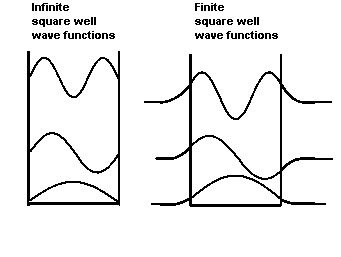

In [38]:
# Figure 4 - Finite square well compared to infinite square well
Image('http://electron6.phys.utk.edu/phys250/modules/module%202/images/1d_pro2.gif', width=500)
# Unfortunately the image quality is not ideal, but it was the only image showing comparison

### $ V_0 = 1800\:eV $ ###

Now I shall increase $ V_0 $ by $ 1000\:eV $ to $ V_0 = 1800\:eV $ so see what effect this will have on the energies and the wavefunctions.

<IPython.core.display.Javascript object>


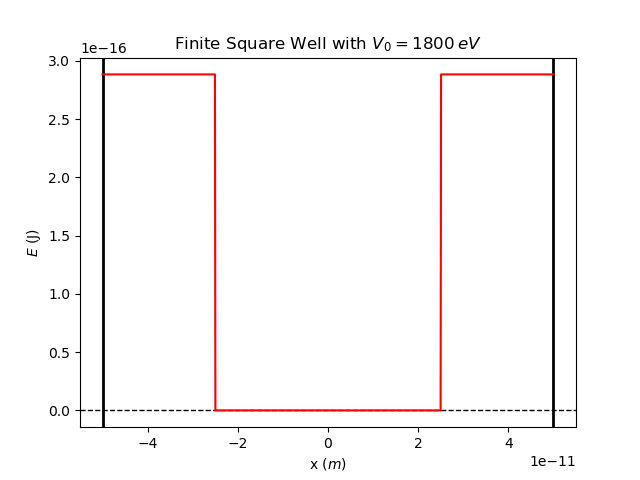

In [39]:
V0 = 1800*e # Starting potential in JOULES (J)

V2 = [] # empty array for potentials of finite square well
for i in xpoints:
    if -a/2 <= i <= a/2: # V = 0 when |x|<=a/2
        V2.append(0)
    elif np.abs(i) > a/2: # V = V0 when |x|>a/2
        V2.append(V0)

# plotting the finite square well for V0 = 1800 eV to see its shape
plt.figure()
plt.xlabel('x $ (m) $')
plt.ylabel('$E$ (J)')
plt.title('Finite Square Well with $ V_0 = 1800\:eV $')
plt.axvline(x=-a,c='k',ls='-',lw=2) # black boundary line at x = -a
plt.axvline(x=a,c='k',ls='-',lw=2) # black boundary line at x = a
plt.axhline(c='k',ls='--',lw=1) # plots fine black at psi(x) = 0
plt.plot(xpoints, V2, 'r')

In the above code cell I have plotted the finite square well for $ V_0 = 1800\:eV $. The potential walls in this example are much higher than the previous example, so the results should be very much different.

The calculated energy is E =  1.7174135258176152e-17 J
...which is 107.19252199658332 eV

The calculated energy is E =  6.79792332142221e-17 J
...which is 424.2930046889718 eV

The calculated energy is E =  1.496164044168724e-16 J
...which is 933.8321540160309 eV

The calculated energy is E =  2.5315145703901573e-16 J
...which is 1580.0471301286104 eV



<IPython.core.display.Javascript object>


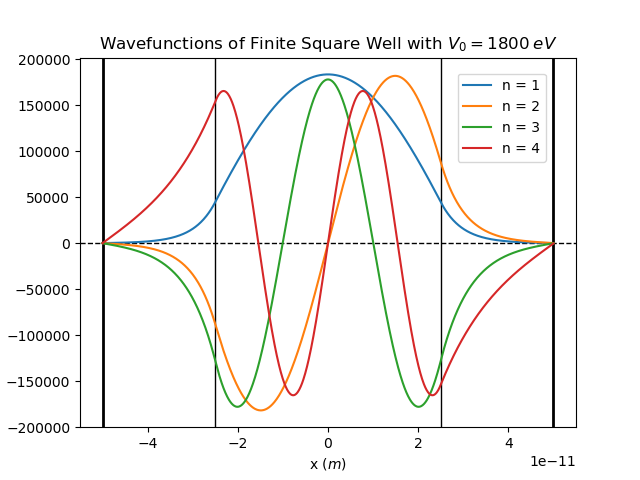

In [40]:
# the energy guesses below were deduced through trial and error
# if wrong energy value deduced, the guesses are altered
# the energy eigenvalues are not known
yh1 = finite(1, 0*e, 200*e)
yh2 = finite(2, 200*e, 400*e)
yh3 = finite(3, 500*e, 600*e)
yh4 = finite(4, 700*e, 1200*e)

# plotting each normalised wavefunction on same graph
plt.figure()
plt.xlabel('x $ (m) $')
plt.ylabel('$\psi(x)$')
plt.title('Wavefunctions of Finite Square Well with $ V_0 = 1800\:eV $')
plt.axvline(x=-a,c='k',ls='-',lw=2) # black boundary line at x = -a
plt.axvline(x=a,c='k',ls='-',lw=2) # black boundary line at x = a
plt.axvline(x=-a/2,c='k',ls='-',lw=1) # finite square well boundary line at x = -a/2
plt.axvline(x=a/2,c='k',ls='-',lw=1) # finite square well boundary line at x = -a/2
plt.axhline(c='k',ls='--',lw=1) # plots fine black at psi(x) = 0
plt.plot(xpoints, yh1[0:N], label="n = 1")
plt.plot(xpoints, yh2[0:N], label="n = 2")
plt.plot(xpoints, yh3[0:N], label="n = 3")
plt.plot(xpoints, yh4[0:N], label="n = 4")
plt.legend(bbox_to_anchor=(0.85, 0.7))

In the code cell above I have outputted the energy eigenvalues for different eigenstates within a finite potential well of boundary potential $ V_0 = 1800\:eV $.

The shapes of the plotted wavefunctions are what is expected for a finite square well, as seen by comparison to Figure 4 above. Furthermore this time since $ V_0 = 1800\:eV $ and all of the energies for the eigenstates are lower than the boundary potential, all of the wavefunctions decrease in amplitude after passing the boundaries of the finite potential well until reaching the boundary of the infinite square well.

As mentioned previously the higher the energy of the eigenstate, the more constant (more straight line) the gradient of the wavefunction will be outside of the boundaries of the finite square well. This is quite clearly shown by comparing the $ n = 4 $ state of $ V_0 = 1800\:eV $ graph and the $ n = 3 $ state of $ V_0 = 800\:eV $ graph, as the energy value is much lower $ 1800\:eV>1580.05\:eV $ than the wall potential in this example, compared to $ 800\:eV>745.56\:eV $ the previous example. This results in a less constant (more curved line) value for gradient of the wavefunction outside of the potential well. Therefore the $ 1800\:eV $ has a greater effect in decreasing the amplitude of the wavefunction. This means that there is a smaller probability of finding the particle (electron) close to the walls of the infinite square well is smaller for the higher potential.

### $ V_0 = 800\:eV $ & Width of Finite Square Well Halved ###

Now I will be using the original boundary potential of $ V_0 = 800\:eV $, except this time I will be changing the width of the finite square well to see the effect this has on the energy eigenvalues and the wavefunctions.

<IPython.core.display.Javascript object>


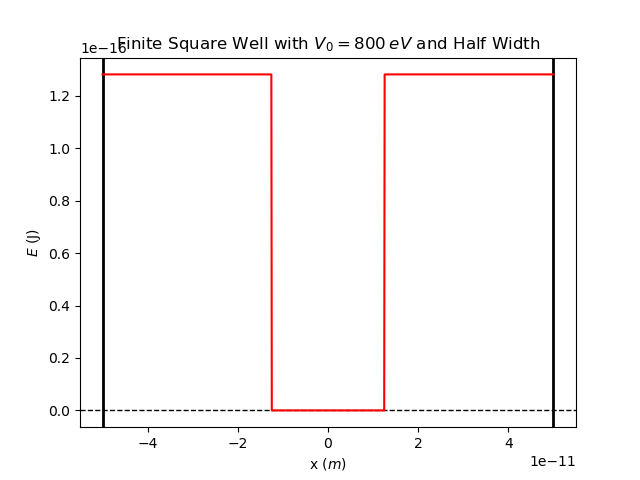

In [41]:
V0 = 800*e # Starting potential in JOULES (J)
a = 2.5e-11 # new width of finite square well in METRES (m)

V3 = [] # empty array for potentials of finite square well
for i in xpoints:
    if -a/2 <= i <= a/2: # V = 0 when |x|<=a/2
        V3.append(0)
    elif np.abs(i) > a/2: # V = V0 when |x|>a/2
        V3.append(V0)

# plotting the finite square well for V0 = 800 eV to see its shape
plt.figure()
plt.xlabel('x $ (m) $')
plt.ylabel('$E$ (J)')
plt.title('Finite Square Well with $ V_0 = 800\:eV $ and Half Width')
plt.axvline(x=-2*a,c='k',ls='-',lw=2) # black boundary line at x = -a
plt.axvline(x=2*a,c='k',ls='-',lw=2) # black boundary line at x = a
plt.axhline(c='k',ls='--',lw=1) # plots fine black at psi(x) = 0
plt.plot(xpoints, V3, 'r')

In the above code cell I have plotted the finite square well for $ V_0 = 800\:eV $ once again, except the width of the finite square well has been halved, which was done by changing the variable for the half-width of the infinite square well to $ a = 2.5 \times 10^{11}m $.

The calculated energy is E =  3.853671698966426e-17 J
...which is 240.52727089267012 eV

The calculated energy is E =  1.2560887621859351e-16 J
...which is 783.9889476017538 eV

The calculated energy is E =  1.6468919099570577e-16 J
...which is 1027.9090890472846 eV

The calculated energy is E =  1.908769418610072e-16 J
...which is 1191.3601751410354 eV



<IPython.core.display.Javascript object>


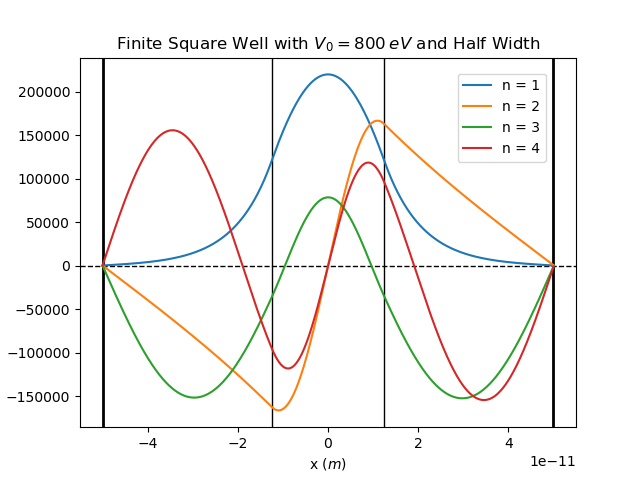

In [42]:
# the energy guesses below were deduced through trial and error
# if wrong energy value deduced, the guesses are altered
# the energy eigenvalues are not known
yh1 = finite(1, 0*e, 100*e)
yh2 = finite(2, 100*e, 500*e)
yh3 = finite(3, 500*e, 1000*e)
yh4 = finite(4, 1000*e, 1300*e)

# plotting each normalised wavefunction on same graph
plt.figure()
plt.xlabel('x $ (m) $')
plt.ylabel('$\psi(x)$')
plt.title('Finite Square Well with $ V_0 = 800\:eV $ and Half Width')
plt.axvline(x=-2*a,c='k',ls='-',lw=2) # black boundary line at x = -a
plt.axvline(x=2*a,c='k',ls='-',lw=2) # black boundary line at x = a
plt.axvline(x=-a/2,c='k',ls='-',lw=1) # finite square well boundary line at x = -a/2
plt.axvline(x=a/2,c='k',ls='-',lw=1) # finite square well boundary line at x = -a/2
plt.axhline(c='k',ls='--',lw=1) # plots fine black at psi(x) = 0
plt.plot(xpoints, yh1[0:N], label="n = 1")
plt.plot(xpoints, yh2[0:N], label="n = 2")
plt.plot(xpoints, yh3[0:N], label="n = 3")
plt.plot(xpoints, yh4[0:N], label="n = 4")
plt.legend(bbox_to_anchor=(0.85, 0.7))

In the code cell above I have outputted the energy eigenvalues for different eigenstates within a potential well of boundary potential $ V_0 = 800\:eV $, whilst also changing the width of the finite square well.

The shapes of the plotted wavefunctions are, once again, what we expect wavefunctions to look like for a finite square well. The lowest 2 eigenstates, $ n = 1 $ and $ n = 2 $, have energies that are lower than the boundary potential energy at $ E = 240.53\:eV $ and $ E = 783.99\:eV $ respectively. So for those 2 wavefunctions the amplitude decreases after passing the boundaries of the finite potential well. For $ n = 2 $ the energy is only slightly lower than the boundary potential energy, which results in the gradient of the wavefunction to be almost constant (nearly straight line) past the boundaries of the finite square well, which is as expected from the previous 2 examples. The $ n = 3 $ and $ n = 4 $ eigenstates have an energy greater than the boundary potential since $ 1027.91\:eV>800\:eV $ and $ 1191.36\:eV>800\:eV $ respectively, so they have a continous wavefunction outside of the potential well. This means that the particle (electron) can escape the potential well.

## Other Potentials - Potential Step ##

Finally we have reached the last part of this notebook. For this final part I shall be choosing my own potential to be the base of the infinite square well.
So I have chosen to do a potential step, shown by the expressions below:

$$
V_x = \begin{cases} 0 & \text{if } x < 0, \\ 
    V_0  & \text{if } x \geq 0 \end{cases} 
$$

The potential step is used to show incident, transmitted and reflected matter waves.

In [43]:
def V(x):
    '''4th and final function for the potential within the infinite square well. The potential
    is V0 for the range of x >= 0, and for x < 0, the potential is 0.
    As always the potential for |x| > a is infinity.
    Input: a value of x
    Output: V, the potential dependent on x position'''
    
    # if loop determines potential depending on value of x
    if x < 0: # x < 0, potential is zero
        V = 0
    elif x >= 0: # x >= 0, potential is V0
        V = V0

    return V # returns value of potential depending on x value

In the code cell above I have created the potential step function that has a potential of $ V_0 $ in the range $ x \geq 0 $, and zero everywhere else.

### $ V_0 = 1000\:eV $ ###

<IPython.core.display.Javascript object>


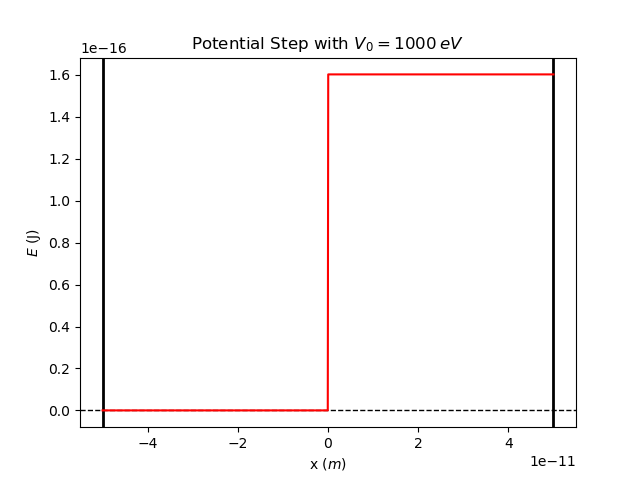

In [44]:
V0 = 1000*e # Starting potential in JOULES (J)
# resetting half-wdith value after being previousy changed
a = 5e-11 # half-width of infinite square well in METRES (m)

V3 = [] # empty array for potentials
for i in xpoints:
    if i < 0: # V = 0 when x < 0
        V3.append(0)
    elif i >= 0: # V = V0 when x >= 0
        V3.append(V0)

# plotting potential step for V0 = 1000 eV to see its shape
plt.figure()
plt.xlabel('x $ (m) $')
plt.ylabel('$E$ (J)')
plt.title('Potential Step with $ V_0 = 1000\:eV $')
plt.axvline(x=-a,c='k',ls='-',lw=2) # black boundary line at x = -a
plt.axvline(x=a,c='k',ls='-',lw=2) # black boundary line at x = a
plt.axhline(c='k',ls='--',lw=1) # plots fine black at psi(x) = 0
plt.plot(xpoints, V3, 'r')

The calculated energy is E =  1.9017243334931374e-17 J
...which is 118.69629788338425 eV

The calculated energy is E =  7.47529887826216e-17 J
...which is 466.5714619067503 eV

The calculated energy is E =  1.5728314881926954e-16 J
...which is 981.6842091933006 eV



<IPython.core.display.Javascript object>


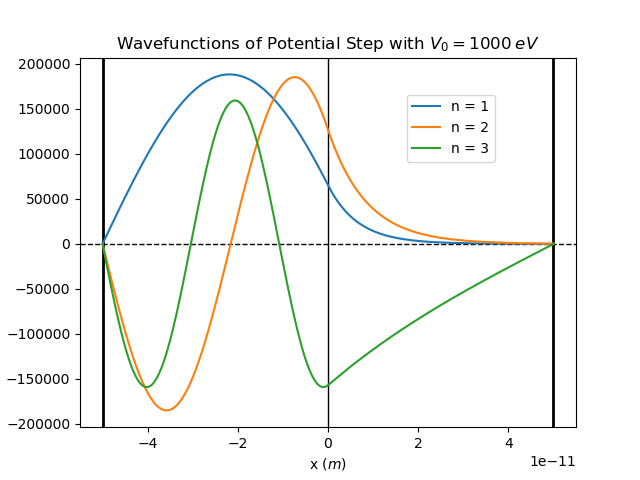

In [45]:
# the energy guesses below were deduced through trial and error
# if wrong energy value deduced, the guesses are altered
# the energy eigenvalues are not known
yh1 = finite(1, 0*e, 200*e)
yh2 = finite(2, 200*e, 400*e)
yh3 = finite(3, 400*e, 700*e)

# plotting each normalised wavefunction on same graph
plt.figure()
plt.xlabel('x $ (m) $')
plt.ylabel('$\psi(x)$')
plt.title('Wavefunctions of Potential Step with $ V_0 = 1000\:eV $')
plt.axvline(x=-a,c='k',ls='-',lw=2) # black boundary line at x = -a
plt.axvline(x=a,c='k',ls='-',lw=2) # black boundary line at x = a
plt.axvline(x=0,c='k',ls='-',lw=1) # potential step boundary line at x = 0
plt.axhline(c='k',ls='--',lw=1) # plots fine black at psi(x) = 0
plt.plot(xpoints, yh1[0:N], label="n = 1")
plt.plot(xpoints, yh2[0:N], label="n = 2")
plt.plot(xpoints, yh3[0:N], label="n = 3")
plt.legend(bbox_to_anchor=(0.85, 0.7))

In the code cell above I have outputted the energy eigenvalues for the lowest 3 eigenstates within the system. I have also calculated and plotted the normalised wavefunctions on the same graph.

By looking at the energy values we can see that in the left half, where the potential is zero, the wavefunction is similar to what we have seen so far in this notebook. However once the wavefunction passes the boundary of the potential step $ x = 0 $, the amplitude of the wavefunction decreases until at $ x = a $ (boundary of infinite square well), the amplitude becomes zero. Once again $ n = 3 $ has an energy that is very close to the potential energy of the step $ 1000\:eV>981.68\:eV $. Therefore the gradient of the wavefunction after passing the boundary of the potential step is almost constant (nearly straight line).

Unfortunately I cannot find the known energy eigenvalues or wavefunction for this potential, hence I cannot compare the calculated results. However the shape of the plotted wavefunctions are expected because the potential step dampens the amplitude of the wavefunction past the boundary of the step.

# Conclusion #

In this notebook I have numerically solved the quantum-mechanical problem of a particle within an infinite square well. Since the Schrödinger equation is a linear, eigenvalue equation, it has solutions only at specific values of energy $ E $. Therefore the equation had to be solved numerically by using the 4th-order Runge Kutta method, after separating the Schrödinger equation into two 1st-order equations.

Initially I started off with an infinite square well with zero potential within the well. This was so that that I could create an iterative method for solving for the energy eigenvalue of an eigenstate using the Secant method. Then I used the trapezoidal rule to normalise the wavefunction, then plot the calculated wavefunction against the known wavefunction to check whether the method I used was accurate. This was initially done for the ground state in the infinite square well. Having confirmed that the energy value obtained for the ground state was correct and the plotted wavefunction matched the known wavefunction, I carried out the same procedure for higher energy states of the infinite square well which also matched for energy values and wavefunctions. Following this, I did the same process but this time changing the base potential of the infinite square well to a harmonic potential, a finite square well and finally a potential step.

Unfortunately the energy value comparisons could not be done for the finite square well and the potential step as these are not solvable analytically, however the harmonic potential was comparable to known energy values. At low boundary potentials such as $ V_0 = 400\:eV $, the calculated and known energies differed a great deal, whereas for higher boundary potentials such as $ V_0 = 1600\:eV $, the $ \% $ difference between known and calculated energies were very small. This showed that iterative method created was not able to accurately find solutions for higher eigenstates within the harmonic potential well.

# References #

[1] - https://upload.wikimedia.org/wikipedia/commons/thumb/2/27/Infinite_potential_well.svg/1280px-Infinite_potential_well.svg.png

[2] - https://en.wikipedia.org/wiki/Quantum_harmonic_oscillator

[3] - https://cnx.org/resources/da589c2ca5119faabbadedab0abc12cdb56f0166/CNX_UPhysics_40_05_states.jpg

[4] - http://electron6.phys.utk.edu/phys250/modules/module%202/images/1d_pro2.gif